In [ ]:
%load_ext autoreload
%autoreload 2
import os
prefix = ''
if os.path.expanduser('~') == '/home/baraldian': # UNI env
    prefix = '/home/baraldian'
else:
    from google.colab import drive
    drive.mount('/content/drive')
softlab_path = os.path.join(prefix + '/content/drive/Shareddrives/SoftLab/')
project_path = os.path.join(softlab_path, 'Projects', 'Fairness','scalable-fairlearn')
import sys
sys.path.append(os.path.join(project_path))
sys.path = list(set(sys.path))

exec(open(os.path.join(project_path,'notebook_import_utility_env.py')).read())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
09adb38d7536


In [ ]:
import sys
print(sys.version)

3.7.14 (default, Sep  8 2022, 00:06:44) 
[GCC 7.5.0]


In [ ]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns;

sns.set()  # for plot styling

In [ ]:
sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 16, "figure.dpi": 100, 'savefig.dpi': 400})
plt.tight_layout()
sns.set_context(rc={"legend.fontsize": 8.5})

<Figure size 600x400 with 0 Axes>

In [ ]:
from utils import mean_confidence_interval, aggregate_phase_time, get_last_results, add_combined_stats, get_info
base_dir = os.path.join(project_path, "results", "sparc20", "adult")
all_model_df = get_last_results(base_dir)
all_model_df = add_combined_stats(all_model_df)

In [ ]:
df = all_model_df[all_model_df['model_name'] != 'combined']

In [ ]:
df['phase'].unique()

array(['train', 'evaluation', 'expgrad_fracs', 'lin_prog', 'grid_frac'],
      dtype=object)

In [ ]:

import numpy as np
import pandas as pd
from scipy.stats import sem, t
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

def mean_confidence_interval(data, confidence: float = 0.95):
    """
    Args:
        data:
        confidence:

    Returns:
        mean and confidence limit values for the given data and confidence
    """
    if data is None:
        return [np.nan, np.nan, np.nan]

    a = np.asarray(data).astype(float)
    n = len(a)
    m, se = np.nanmean(a, 0), sem(a, nan_policy="omit", ddof=1)
    t_value = t.ppf((1.0 + confidence) / 2., n - 1)
    h1 = m - se * t_value
    h2 = m + se * t_value
    return pd.DataFrame([[m, h1, h2]], columns=['mean','p5','p95'])

def get_confidence_error(data, confidence: float = 0.95):
    a = np.asarray(data).astype(float)
    n = len(a)
    se = sem(a, nan_policy="omit", ddof=1)
    t_value = t.ppf((1.0 + confidence) / 2., n - 1)
    return 2 * se * t_value

In [ ]:
model_name_map = { name : f'{name[0]}_{name.split("_")[-1][0]}' for name in df['model_name'].unique() }
df['model_name'] = df['model_name'].map(model_name_map)
df

,model_name,time,phase,random_seed,train_error,test_error,train_violation,test_violation,train_di,test_di,train_TPRB,test_TPRB,train_TNRB,test_TNRB,eps,frac,grid_frac,alpha
1800,u_u,0.0528,train,0,0.1587,0.1608,0.1257,0.1235,0.2311,0.2254,0.1742,0.1922,-0.0842,-0.0813,NaN,NaN,NaN,NaN
1801,f_f,22.4617,train,0,0.1664,0.1649,0.0500,0.0479,1.2027,1.2999,0.1282,0.1023,-0.0145,-0.0063,0.0500,NaN,NaN,NaN
1802,e_f,0.1554,evaluation,0,0.2039,0.2008,0.0727,0.0682,3.2496,3.3728,0.0847,0.0726,-0.0803,-0.0739,0.0500,0.0010,0.1000,NaN
1803,e_f,0.5863,expgrad_fracs,0,0.2039,0.2008,0.0727,0.0682,3.2496,3.3728,0.0847,0.0726,-0.0803,-0.0739,0.0500,0.0010,0.1000,NaN
1804,h_5,0.2008,evaluation,0,0.2126,0.2099,0.0500,0.0455,3.2496,3.3728,0.0847,0.0726,-0.0803,-0.0739,0.0500,0.0010,0.1000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2937,h_3,0.3199,lin_prog,9,0.1665,0.1647,0.0500,0.0489,0.5578,0.5541,0.1489,0.1306,-0.0078,-0.0020,0.0500,1.0000,0.1000,0.5000
2938,h_4,0.1410,evaluation,9,0.1669,0.1650,0.0481,0.0470,0.6261,0.6239,0.1489,0.1306,-0.0078,-0.0020,0.0500,1.0000,0.1000,0.5000
2939,h_4,22.3938,expgrad_fracs,9,0.1669,0.1650,0.0481,0.0470,0.6261,0.6239,0.1489,0.1306,-0.0078,-0.0020,0.0500,1.0000,0.1000,0.5000
2940,h_4,1.0164,grid_frac,9,0.1669,0.1650,0.0481,0.0470,0.6261,0.6239,0.1489,0.1306,-0.0078,-0.0020,0.0500,1.0000,0.1000,0.5000


# Model end-to-end time stacked by phase

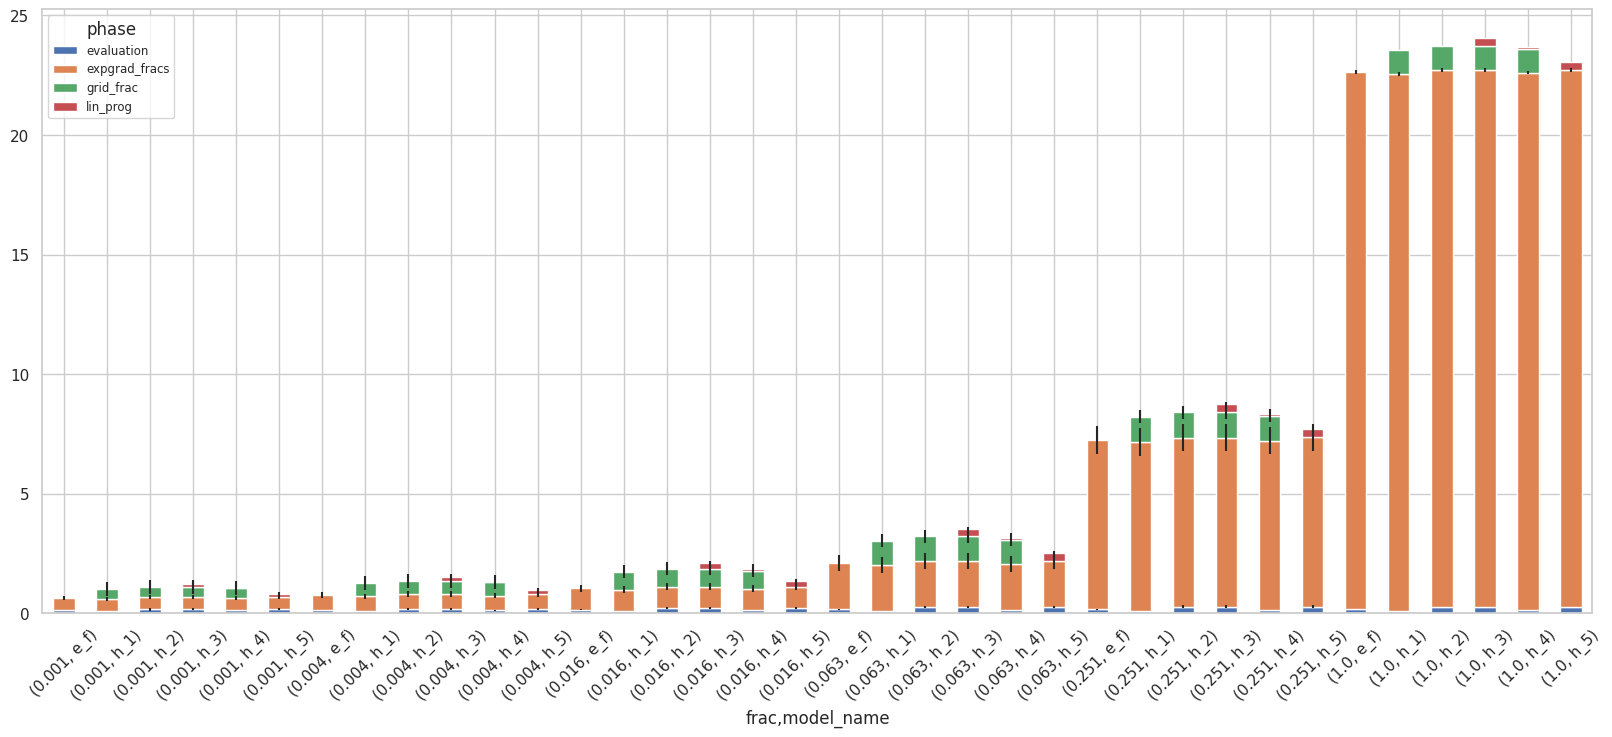

In [ ]:

to_plot = df.groupby(['frac', 'model_name','phase']).agg({'time': ['mean', ('error',get_confidence_error)]}).unstack(['phase'])
fig, ax = plt.subplots(figsize=(20,8))
yerr = to_plot.loc[:,('time','error',slice(None))]
to_plot.plot.bar(stacked=True, y=('time','mean'), yerr=yerr.values.T,rot=45, ax=ax)

# Time trend evaluation time x fraction

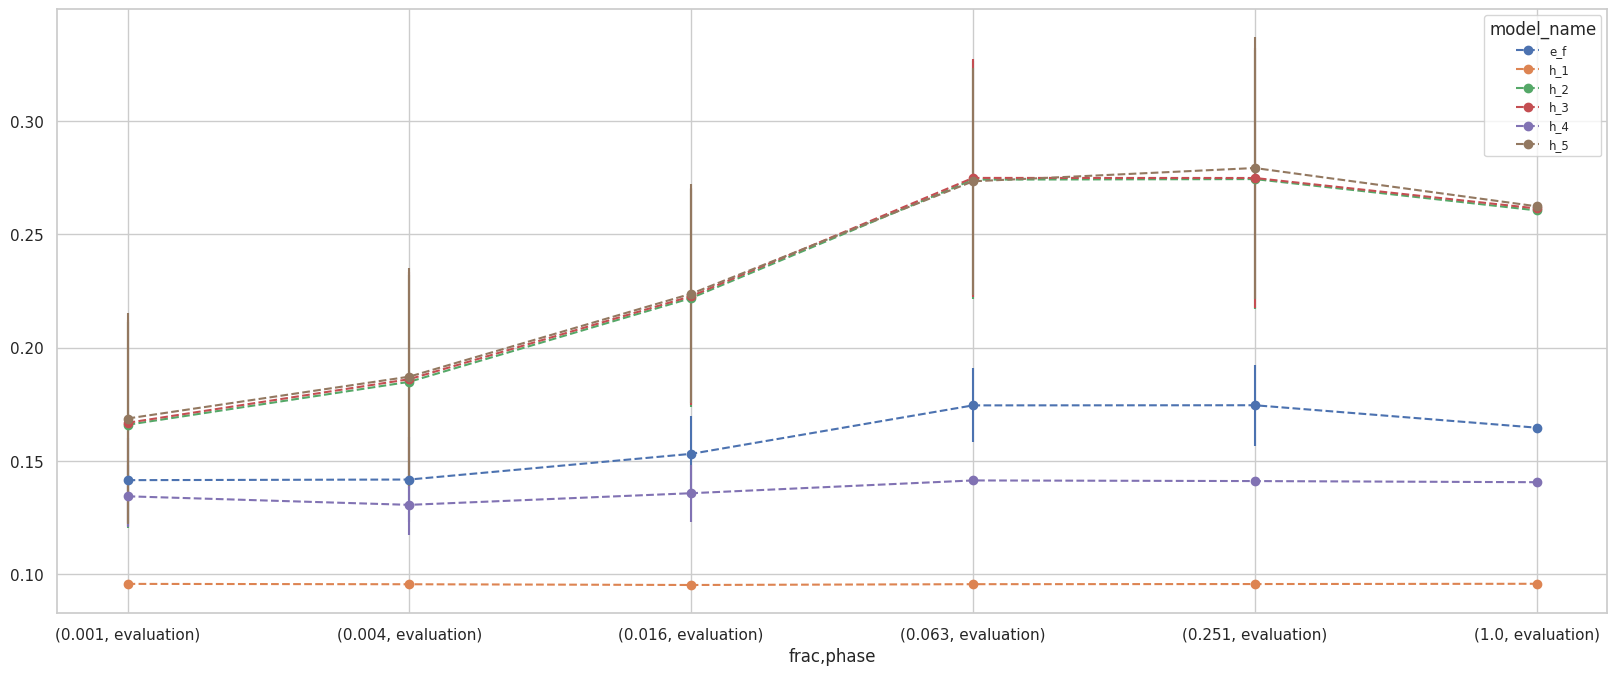

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
to_plot = df.groupby(['model_name','frac', 'phase']).agg({'time': ['mean', ('error',get_confidence_error)]}).fillna(0).reset_index()
to_plot = to_plot[to_plot['phase'] == "evaluation"].pivot(index=['frac','phase'], columns='model_name')

yerr = to_plot.loc[:,('time','error',slice(None))]
to_plot.plot(y=('time','mean'), yerr=yerr.values.T,rot=0, ax=ax, fmt='--o')



# Time of each phase vs frac

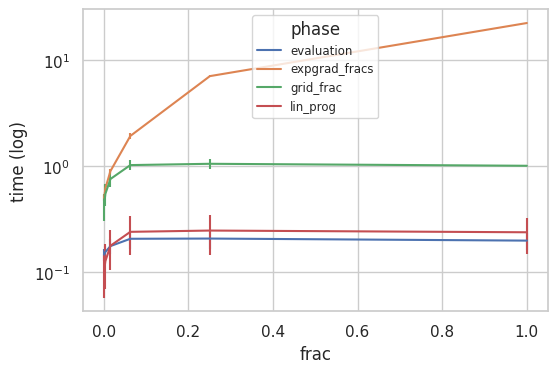

In [ ]:
to_plot = df.groupby(['frac', 'phase']).agg({'time': ['mean', ('error',get_confidence_error)]}).unstack('phase')
fig, ax = plt.subplots()
yerr = to_plot.loc[:,('time','error',slice(None))]
to_plot.plot(y=('time','mean'), yerr=yerr.values.T,rot=0, ax=ax, ylabel='time (log)')
ax.set_yscale("log")


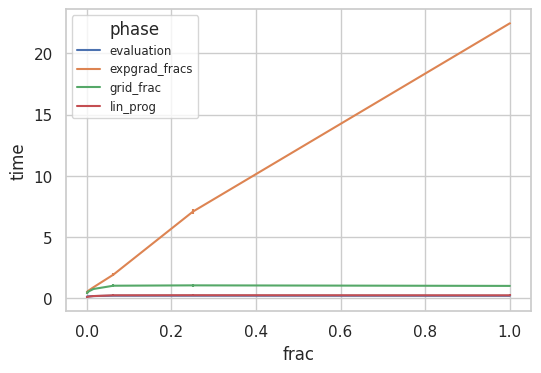

In [ ]:
to_plot = df.groupby(['frac', 'phase']).agg({'time': ['mean', ('error',get_confidence_error)]}).unstack('phase')
fig, ax = plt.subplots()
yerr = to_plot.loc[:,('time','error',slice(None))]
to_plot.plot(y=('time','mean'), yerr=yerr.values.T,rot=0, ax=ax, ylabel='time')